<a href="https://colab.research.google.com/github/balamurugan-palaniappan-CEP/AIML_CEP_2021/blob/main/Illustrating_Optimization_practice_github_2021Dec12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$\Large\textbf{Welcome to Optimization for ML Session}$  

$\large\textbf{Illustrating optimization for some simple functions: }$

We start with a generic optimization problem: 

$
\begin{align}
\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x}).
\end{align}
$

Note that we have considered a $\large{\text{minimization problem}}$ here, which would be relevant to some ML applications. 

We call the function $f(\mathbf{x})$ as the $\large{\text{objective function}}$. 

We call the variable $\mathbf{x}$ as the $\large{\text{decision variable}}$ or $\large{\text{optimization variable}}$. 

The set from which the decision variable arises is called $\large{\text{feasible set}}$. In our case, ${\mathbb{R}}^n$, the $n$-dimensional Euclidean space is the feasible set. 

Suppose if our problem had been of the form 

$
\begin{align}
\min_{\mathbf{x}} & \ f(\mathbf{x}) \\ 
\text{s.t.} & \ x \in \mathcal{C}
\end{align}
$

then $\mathcal{C}$ is called the feasible set. Usually constraints define the feasible set. Typically $\mathcal{C}$ is assumed to be a subset of some high dimensional Euclidean space. 



$\large{\text{Example:}}$ Recall the SVM optimization problem.

Given a training set $\{(x^i,y^i)\}_{i=1}^{n}$ where $x^i \in {\mathbb{R}}^d, y^i \in \{+1,-1\}$, $\forall i \in  \{1,2,\ldots,n\}$, we solve: 

$
\begin{align}
\min_{w \in {\mathbb{R}}^d,b\in \mathbb{R}, {\xi_i} \in {\mathbb{R}}  } & \ \frac{1}{2} \|w\|_2^2 + C \sum_{i=1}^{n} \xi_i
\\ 
\text{s.t.} & \ y^i (w^\top x^i + b) \geq 1-\xi_i \ \forall i \in \{1,2,\ldots,n\} \text{ and } \\ 
& \ \xi_i \geq 0 \ \forall i \in \{1,2,\ldots,n\}. 
\end{align}
$

#Exercise:

Find the feasible set in SVM optimization problem. 

$\Large{\text{What do we require to solve }}$ $\min_{x \in {\mathbb{R}}^n} f(\mathbf{x})$ $\Large{\text{?}}$


$\textbf{Recall:}$ when we restrict to $n=1$, that is when $\mathbf{x} \in {\mathbb{R}}$, the real line, we can use basic calculus techniques to solve  $\min_{x \in {\mathbb{R}}} f(\mathbf{x})$. 

$\large{\text{Example:}}$ 

Consider solving $\min_{x \in {\mathbb{R}}} x^2$. 



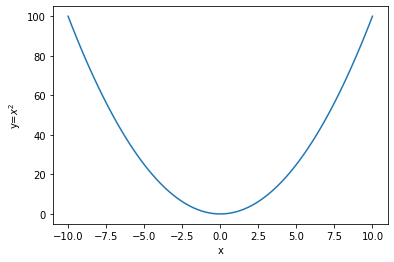

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-10,10,100)
#y = 3*np.ones(len(x))
y = x**2

fig, ax = plt.subplots(1,1)
ax.plot(x,y)
ax.set_xlabel('x')
ax.set_ylabel('y=$x^2$')
plt.show()



From calculus, we will do the following:



1.   First we find the derivative (or) differential $f'(\mathbf{x})$ of the objective function  and then equate it to zero. Hence $f'(\mathbf{x}) = 0$ is solved to find some $\tilde{\mathbf{x}}$ such that $f'(\tilde{\mathbf{x}}) = 0$. 
2.   Then we check if $\tilde{\mathbf{x}}$ is indeed a minimizer by checking if the double derivative of the objective function at $\tilde{\mathbf{x}}$ is positive or not. Hence we check if $f''(\tilde{\mathbf{x}}) > 0$. If this holds, we take $\tilde{x}$ as the minimizer. 




$\large{\text{Question:}}$ 

Can we extend this idea to ${\mathbb{R}}^n$ where $n>1$ as well? 

Suppose we wish to extend the above idea. Let us assume that $\mathbf{x}=\begin{bmatrix}
x_1 \\ x_2 \\ \vdots \\ x_n
\end{bmatrix} \in {\mathbb{R}}^n$. 

Then we need to perform the following: 

1.   First we find the gradient of the objective function $\nabla f(\mathbf{x}) = \begin{bmatrix}
\frac{\partial f(\mathbf{x})}{\partial x_1} \\ \frac{\partial f(\mathbf{x})}{\partial x_2} \\ \vdots \\ \frac{\partial f(\mathbf{x})}{\partial x_n}
\end{bmatrix}$ and then equate it to zero vector. Hence $\nabla f(\mathbf{x}) = \mathbf{0}$ is solved to find some $\tilde{\mathbf{x}}$ such that $\nabla f(\tilde{\mathbf{x}}) = \mathbf{0}$. 
2.   Then we check if $\tilde{\mathbf{x}}$ is indeed a minimizer by checking if the Hessian matrix denoted by:
$
H(\tilde{\mathbf{x}})=\begin{bmatrix}
\frac{\partial^2 f(\tilde{\mathbf{x}})}{\partial x_1 \partial x_1} & \frac{\partial^2 f(\tilde{\mathbf{x}})}{\partial x_1 \partial x_2} & \ldots & \frac{\partial^2 f(\tilde{\mathbf{x}})}{\partial x_1 \partial x_n} \\
\vdots & \vdots & \ldots & \vdots \\
\frac{\partial^2 f(\tilde{\mathbf{x}})}{\partial x_n \partial x_1} & \frac{\partial^2 f(\tilde{\mathbf{x}})}{\partial x_n \partial x_2} & \ldots & \frac{\partial^2 f(\tilde{\mathbf{x}})}{\partial x_n \partial x_n} 
\end{bmatrix}
$
is $\textbf{positive definite}$ or not (by $\textbf{positive definite}$, we mean that $H$ matrix should have positive eigen values). 


$\large{\text{Recall:}}$ We call $x \neq 0$ as an eigen vector of matrix $A$  with corresponding eigen value $\lambda$ when the following holds: 

$Ax=\lambda x$ 

There are some disadvantages with this approach: 

1.   Solving $\nabla f(\tilde{\mathbf{x}})=\mathbf{0}$ is in general not possible or computationally expensive. 
2.   Checking the positive definiteness of $H$ matrix is computationally demanding. 

Due to these reasons, we adopt an iterative procedure which we discuss next. 


$\Large{\text{The concept of descent direction}}$ 

Suppose we want to solve: $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$. 

Let us say we are at some point $\tilde{\mathbf{x}}$ and suppose we know that $\tilde{\mathbf{x}}$ is not a minimizer of $f(\mathbf{x})$. 

Then we need to move away from the point $\tilde{\mathbf{x}}$ towards a better point. 

$\large{\text{Question: How do we move away from a non-optimal point towards an optimal point?}}$ 

The idea is to use descent direction. A direction $\mathbf{d} \in {\mathbb{R}}^n$ is called a descent direction of $f$ at $\mathbf{\tilde{x}}$ if the following holds:

$
\begin{align}
f(\tilde{\mathbf{x}} + \alpha \mathbf{d}) < f(\tilde{\mathbf{x}})
\end{align}
$ 
where $\alpha>0$ is called a $\textbf{step length}$ and is generally assumed to be a small positive quantity,  

Hence to move away from a non-optimal point $\tilde{\mathbf{x}}$, we want to find the following two quantities:


1.   a suitable descent direction $\mathbf{d}$ of $f$ at $\tilde{\mathbf{x}}$
2.   a suitable step length $\mathbf{\alpha}$ 

Suppose we have found the descent direction $\mathbf{d}$ and the step length $\alpha$, we can do the following:



*   Update the current non-optimal point $\tilde{\mathbf{x}}$ to $\tilde{\mathbf{x}}+\alpha \mathbf{d}$.

A simple algorithm which uses this idea is the $\large{\text{Gradient Descent}}$ algorithm. 

In particular, we will see a version of the gradient descent algorithm where $\mathbf{d}$ is taken to be $\textbf{negative gradient}$ direction and $\alpha$ is taken to be constant. 










We will start with a procedure which helps to find a minimizer of the function $f(\mathbf{x})=f(x_1,x_2)= x_1^2 + x_2^2$. 


We will use the following gradient descent type algorithm: 

\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$, Steplength $\eta$}  \\
& \textbf{Initialize } k=0 \\ 
&\textbf{While } \| \nabla f(\mathbf{x}^k) \|_2 > \tau \text{ do:}  \\   
&\quad \quad \mathbf{x}^{k+1} \leftarrow \mathbf{x}^k - \eta \nabla f(\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}

Here we have used the $\ell_2$ norm of the gradient to check if we are at a possible minimizer. 

Note that $\|\nabla f(\mathbf{x})\|_2^2 = \left (\frac{\partial f(\mathbf{x})} {\partial x_1} \right )^2 + \left (\frac{\partial f(\mathbf{x})} {\partial x_2} \right )^2 + \ldots + \left (\frac{\partial f(\mathbf{x})} {\partial x_n} \right )^2$.

Also note that we have used the step length $\eta$ as a constant. 

In [ ]:
#import the required packages 
import numpy as np #numpy is useful for all numerical operations
import matplotlib.pyplot as plt #matplotlib is useful for plotting purposes
from mpl_toolkits.mplot3d import Axes3D #this package would be useful for 3d plots

In [ ]:
#python method to compute objective function
def obj_fn(x1,x2):
    return x1**2 + x2**2

#python method to compute gradient of the objective function
def grad(x1,x2):
    return np.array([2*x1, 2*x2])

#run the gradient descent algorithm and collect the iterates for plotting  
def grad_descent(tol, step_length, point):
    point_x_list = [] 
    point_y_list = [] 
    funcval_list = [] 
    
    point_x_list.append(point[0])
    point_y_list.append(point[1])
    funcval_list.append(obj_fn(point[0],point[1]))

    gradient = grad(point[0],point[1])

    while np.linalg.norm(gradient)>tol: #check gradient norm and stop if below tol
        point = np.subtract(point, np.multiply(step_length,gradient)) #update step
        gradient = grad(point[0],point[1]) #compute gradient at new point 
        #store the coordinates and function values for plotting
        point_x_list.append(point[0])
        point_y_list.append(point[1])
        funcval_list.append(obj_fn(point[0],point[1]))
        
    point_funcval_array = np.array([np.array(point_x_list),np.array(point_y_list),np.array(funcval_list)],dtype=np.ndarray)        
    return point_funcval_array


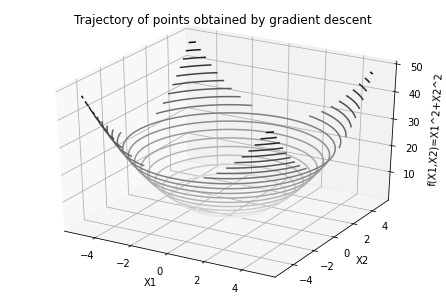

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

#Animation code inspired from https://www.bragitoff.com/2020/10/3d-trajectory-animated-using-matplotlib-python/

# The function used in animation call 
def func(num, trajectory_coord, line):
    # NOTE: there is no .set_data() for 3 dim data...
    line.set_data(trajectory_coord[0:2, :num])    
    line.set_3d_properties(trajectory_coord[2, :num])    
    return line

#generate the contours for function f(x1,x2)= x**2 + y**2
x1 = np.linspace(-5,5,100)
x2 = np.linspace(-5,5,100)

X1, X2 = np.meshgrid(x1, x2)
Z = X1**2 + X2**2

#run gradient descent and collect iterates
#change the values of tol, step_length, point and experiment yourselves
tol = 1e-3 #tolerance for gradient norm and stop criterion
step_length = 0.01 # step length is assumed to be constant here 
point = np.array([-4,4]) #starting point 

points_fval_trajectory = grad_descent(tol, step_length, point)
#print(points_fval_trajectory)

numDataPoints = len(points_fval_trajectory[0])
#print('numDataPoints:',numDataPoints)
#print(points_fval_trajectory[0:2,:3])    

# Get handles to figure and axes
fig = plt.figure()
ax = Axes3D(fig)
 
ax.contour3D(X1, X2, Z, 20, cmap='binary')    

#Note: in 2d plots, we can pass empty arguments to plot function when initializing
#However, we need to pass data into 3d plot function, cannot pass empty arguments
line = plt.plot(points_fval_trajectory[0], points_fval_trajectory[1], points_fval_trajectory[2], lw=2, c='r')[0] # For line plot
 
# set axes properties
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('f(X1,X2)=X1^2+X2^2')
ax.set_title('Trajectory of points obtained by gradient descent')
 
# Create Animation object
line_ani = animation.FuncAnimation(fig, func, frames=numDataPoints, fargs=(points_fval_trajectory,line), interval=50, blit=False)
#we can save the animation as a file 
#line_ani.save(r'AnimationNew.mp4')

#render the animation as a video and display it 
HTML(line_ani.to_html5_video())


$\Large{\text{What happens if we use gradient ascent instead of gradient descent?}}$

That is instead of taking the negative gradient direction, what happens if we consider simply the gradient direction? 

Then the update will look like: 
$\mathbf{x}^{k+1} \leftarrow \mathbf{x}^k +\eta \nabla f(\mathbf{x}^k)$

In [ ]:
#run the gradient ascent algorithm and collect the iterates 
def grad_ascent(tol, step_length, point):
    point_x_list = [] 
    point_y_list = [] 
    funcval_list = [] 

    point_x_list.append(point[0])
    point_y_list.append(point[1])
    funcval_list.append(obj_fn(point[0],point[1]))

    gradient = grad(point[0],point[1])

    max_iter = 100
    iter = 1
    while np.linalg.norm(gradient)>tol and iter<=max_iter: #check gradient norm and stop if below tol
        point = np.add(point, np.multiply(step_length,gradient)) #update step now involves positive gradient direction
        gradient = grad(point[0],point[1]) #compute gradient at new point 
        #store the coordinates and function values for plotting
        point_x_list.append(point[0])
        point_y_list.append(point[1])
        funcval_list.append(obj_fn(point[0],point[1]))
        iter += 1

    point_funcval_array = np.array([np.array(point_x_list),np.array(point_y_list),np.array(funcval_list)],dtype=np.ndarray)        
    return point_funcval_array


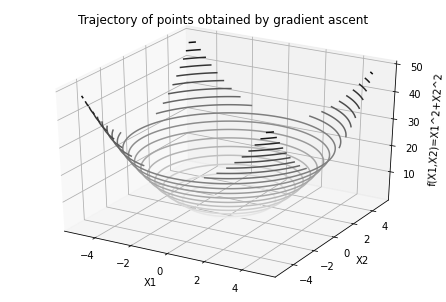

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

#Animation code inspired from https://www.bragitoff.com/2020/10/3d-trajectory-animated-using-matplotlib-python/

# The function used in animation call 
def func(num, trajectory_coord, line):
    # NOTE: there is no .set_data() for 3 dim data...
    line.set_data(trajectory_coord[0:2, :num])    
    line.set_3d_properties(trajectory_coord[2, :num])    
    return line
 
#generate the contours for function f(x1,x2)= x**2 + y**2
x1 = np.linspace(-5,5,100)
x2 = np.linspace(-5,5,100)

X1, X2 = np.meshgrid(x1, x2)
Z = X1**2 + X2**2

#call grad_ascent instead of grad_descent
#change the values of tol, step_length, point and experiment yourselves
tol = 1e-3 #tolerance for gradient norm and stop criterion
step_length = 0.01 # step length is assumed to be constant here 
point = np.array([-0.5,0.5]) #starting point 
points_fval_trajectory = grad_ascent(tol, step_length, point)
#print(points_fval_trajectory)

numDataPoints = len(points_fval_trajectory[0])
#print('numDataPoints:',numDataPoints)
#print(points_fval_trajectory[0:2,:3])    

# Get handles to figure and axes
fig = plt.figure()
ax = Axes3D(fig)
 
ax.contour3D(X1, X2, Z, 20, cmap='binary')    

#Note: in 2d plots, we can pass empty arguments to plot function when initializing
#However, we need to pass data into 3d plot function, cannot pass empty arguments
line = plt.plot(points_fval_trajectory[0], points_fval_trajectory[1], points_fval_trajectory[2], lw=2, c='r')[0] # For line plot
 
# set axes properties
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('f(X1,X2)=X1^2+X2^2')
ax.set_title('Trajectory of points obtained by gradient ascent')
 
# Create Animation object
line_ani = animation.FuncAnimation(fig, func, frames=numDataPoints, fargs=(points_fval_trajectory,line), interval=50, blit=False)
#we can save the animation as a file 
#line_ani.save(r'AnimationNew.mp4')

#render the animation as a video and display it 
HTML(line_ani.to_html5_video())


$\Large{\text{Local and Global Minimizers}}$ 

Note that in the problem considered above, we had a unique minimizer given by $(x_1^*, x_2^* )= (0,0)$. 

However it might happen that there is some point $\tilde{\mathbf{x}}$ such that $f(\tilde{\mathbf{x}}) \leq f({\mathbf{x}})$ for points $\mathbf{x}$ close to $\tilde{\mathbf{x}}$. Such a point $\tilde{\mathbf{x}}$ is called a local minimizer. 

In general, gradient descent can converge to a local minimizer point (or in worst case, gradient descent can also converge to a local maximizer or a saddle point). 

We will discuss the case of local minimizers now. '

Let us consider the function:

$
\begin{align}
f(\mathbf{x}) = f(x_1,x_2) = (|x_1|-5)^2 + (|x_2|-5)^2   
\end{align}
$

where $|x|$ denotes the absolute value of $x$ and is given by: $|x| = \begin{cases}
x & \text{ if } x>=0 \\
-x & \text{ else. }
\end{cases}$

In [ ]:
def obj_fn(x1,x2):
    return (np.abs(x1)-5)**2+(np.abs(x2)-5)**2

def grad(x1,x2):
    if x1 >= 0:
      g_x1 = 1
    else:
      g_x1 = -1
    if x2 >= 0:
      g_x2 = 1
    else:
      g_x2 = -1
    return np.array([2*g_x1*(np.abs(x1)-5), 2*g_x2*(np.abs(x2)-5)])


numDataPoints: 475


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


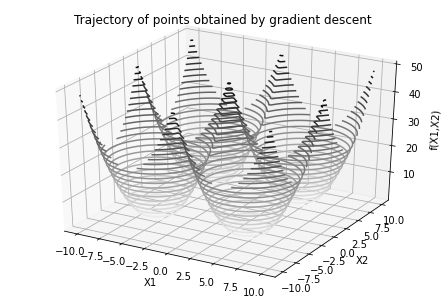

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

#Animation code inspired from https://www.bragitoff.com/2020/10/3d-trajectory-animated-using-matplotlib-python/

# The function used in animation call 
def func(num, trajectory_coord, line):
    # NOTE: there is no .set_data() for 3 dim data...
    line.set_data(trajectory_coord[0:2, :num])    
    line.set_3d_properties(trajectory_coord[2, :num])    
    return line
 
 
#generate the contours for function f(x1,x2)= (|x1|-5)^2 + (|x2|-5)^2
x1 = np.linspace(-10,10,100)
x2 = np.linspace(-10,10,100)

X1, X2 = np.meshgrid(x1, x2)
Z = (np.abs(X1)-5)**2+(np.abs(X2)-5)**2

tol = 1e-3
step_length = 0.01
point = np.array([10,-10])
points_fval_trajectory = grad_descent(tol, step_length, point)
#print(points_fval_trajectory)

numDataPoints = len(points_fval_trajectory[0])
print('numDataPoints:',numDataPoints)
#print(points_fval_trajectory[0:2,:3])    

# Get handles to figure and axes
fig = plt.figure()
ax = Axes3D(fig)
 
ax.contour3D(X1, X2, Z, 30, cmap='binary')    
#ax.plot_surface(X1, X2, Z,cmap='plasma', edgecolor='none')


#Note: in 2d plots, we can pass empty arguments to plot function when initializing
#However, we need to pass data into 3d plot function, cannot pass empty arguments
line = plt.plot(points_fval_trajectory[0], points_fval_trajectory[1], points_fval_trajectory[2], lw=2, c='r')[0] # For line plot
 
# set axes properties
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('f(X1,X2)')
ax.set_title('Trajectory of points obtained by gradient descent')
 
# Create Animation object
line_ani = animation.FuncAnimation(fig, func, frames=numDataPoints, fargs=(points_fval_trajectory,line), interval=50, blit=False)
#we can save the animation as a file 
#line_ani.save(r'AnimationNew.mp4')

#render the animation as a video and display it 
HTML(line_ani.to_html5_video())


$\Large{\text{Impact of different starting points when multiple local minimizers are present}}$

Note that for our example $f(\mathbf{x}) = f(x_1,x_2) = (|x_1|-5)^2 + (|x_2|-5)^2   
$, we note that there are multiple local minimizers.

In such scenario, the starting point has a significance and the point to which gradient descent converges to is dependent upon the starting point. We illustrate this in the following example. 

numDataPoints: 475


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


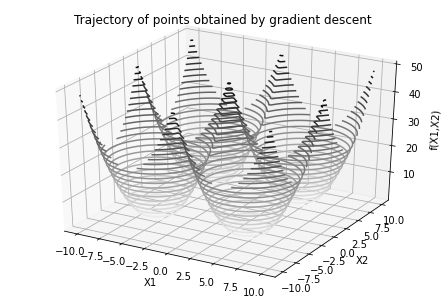

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

#Animation code inspired from https://www.bragitoff.com/2020/10/3d-trajectory-animated-using-matplotlib-python/

# The function used in animation call 
def func(num, trajectory_coord, line):
    # NOTE: there is no .set_data() for 3 dim data...
    line.set_data(trajectory_coord[0:2, :num])    
    line.set_3d_properties(trajectory_coord[2, :num])    
    return line
 
 
#generate the contours for function f(x1,x2)= (|x1|-5)^2 + (|x2|-5)^2
x1 = np.linspace(-10,10,100)
x2 = np.linspace(-10,10,100)

X1, X2 = np.meshgrid(x1, x2)
Z = (np.abs(X1)-5)**2+(np.abs(X2)-5)**2





#we change the starting point and check
tol = 1e-3
step_length = 0.01
point = np.array([0.,0.])
points_fval_trajectory = grad_descent(tol, step_length, point)
#print(points_fval_trajectory)

numDataPoints = len(points_fval_trajectory[0])
print('numDataPoints:',numDataPoints)
#print(points_fval_trajectory[0:2,:3])    

# Get handles to figure and axes
fig = plt.figure()
ax = Axes3D(fig)
 
ax.contour3D(X1, X2, Z, 30, cmap='binary')    
#ax.plot_surface(X1, X2, Z,cmap='plasma', edgecolor='none')


#Note: in 2d plots, we can pass empty arguments to plot function when initializing
#However, we need to pass data into 3d plot function, cannot pass empty arguments
line = plt.plot(points_fval_trajectory[0], points_fval_trajectory[1], points_fval_trajectory[2], lw=2, c='r')[0] # For line plot
 
# set axes properties
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('f(X1,X2)')
ax.set_title('Trajectory of points obtained by gradient descent')
 
# Create Animation object
line_ani = animation.FuncAnimation(fig, func, frames=numDataPoints, fargs=(points_fval_trajectory,line), interval=50, blit=False)
#we can save the animation as a file 
#line_ani.save(r'AnimationNew.mp4')

#render the animation as a video and display it 
HTML(line_ani.to_html5_video())


$\Large{\text{Effect of step length}}$ 

Changing the step length leads to different behaviors depending upon the nature of the function $f(\mathbf{x})$. 

This effect is illustrated in the next example. 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


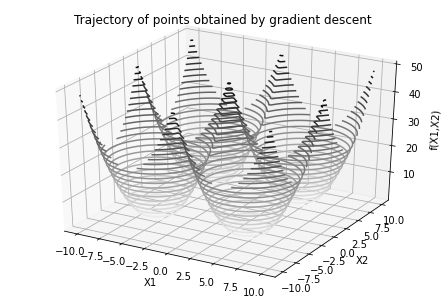

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

#Animation code inspired from https://www.bragitoff.com/2020/10/3d-trajectory-animated-using-matplotlib-python/

# The function used in animation call 
def func(num, trajectory_coord, line):
    # NOTE: there is no .set_data() for 3 dim data...
    line.set_data(trajectory_coord[0:2, :num])    
    line.set_3d_properties(trajectory_coord[2, :num])    
    return line
 
 
#generate the contours for function f(x1,x2)= (|x1|-5)^2 + (|x2|-5)^2
x1 = np.linspace(-10,10,100)
x2 = np.linspace(-10,10,100)

X1, X2 = np.meshgrid(x1, x2)
Z = (np.abs(X1)-5)**2+(np.abs(X2)-5)**2





    
#changing the step length and checking
tol = 1e-3
step_length = 0.9
point = np.array([0.,0.])
points_fval_trajectory = grad_descent(tol, step_length, point)
#print(points_fval_trajectory)

numDataPoints = len(points_fval_trajectory[0])
#print('numDataPoints:',numDataPoints)
#print(points_fval_trajectory[0:2,:3])    

# Get handles to figure and axes
fig = plt.figure()
ax = Axes3D(fig)
 
ax.contour3D(X1, X2, Z, 30, cmap='binary')    
#ax.plot_surface(X1, X2, Z,cmap='plasma', edgecolor='none')


#Note: in 2d plots, we can pass empty arguments to plot function when initializing
#However, we need to pass data into 3d plot function, cannot pass empty arguments
line = plt.plot(points_fval_trajectory[0], points_fval_trajectory[1], points_fval_trajectory[2], lw=2, c='r')[0] # For line plot
 
# set axes properties
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('f(X1,X2)')
ax.set_title('Trajectory of points obtained by gradient descent')
 
# Create Animation object
line_ani = animation.FuncAnimation(fig, func, frames=numDataPoints, fargs=(points_fval_trajectory,line), interval=50, blit=False)
#we can save the animation as a file 
#line_ani.save(r'AnimationNew.mp4')

#render the animation as a video and display it 
HTML(line_ani.to_html5_video())


$\Large{\text{Finding a suitable step length}}$

To find the step length $\alpha$, we will use the following iterative procedure. 

We will start with some choice for $\alpha$ denoted by $\alpha^0$. 

As long as we do not see a decrease in the function value, we keep on decreasing the $\alpha$ value by a factor of $\rho$. 




\begin{align}
& \textbf{Input:}  \text{ $\mathbf{x}^k$, $\mathbf{d}$ }  \\
& \textbf{Initialize } \alpha=\alpha^0 \\
& \textbf{Initialize } \rho \in (0,1)\\ 
&\textbf{While } f(\mathbf{x}^k + \alpha \mathbf{d})   \geq f(\mathbf{x}^k)\text{ do:}  \\   
&\quad \quad \alpha = \rho \alpha  \\
&\textbf{End While} \\
&\textbf{Output: } \alpha
\end{align}

The above procedure to find a suitable step length is called $\textbf{backtracking line search}$ procedure. 

We will now implement the backtracking line search procedure and check the behavior of the algorithm.  

In [ ]:
#run the gradient descent algorithm with backtracking line search and collect the iterates 
def backtracking_line_search_graddescent(point, gradient):
    alpha = 1.
    rho = 0.95
    obj_fn_point = obj_fn(point[0],point[1]) #compute objective function value at the starting point
    temp_point = np.subtract(point, np.multiply(alpha,gradient)) 
    obj_fn_temp_point = obj_fn(temp_point[0],temp_point[1])
    while (obj_fn_temp_point >= obj_fn_point):
      alpha = rho*alpha  
      temp_point = np.subtract(point, np.multiply(alpha,gradient)) 
      obj_fn_temp_point = obj_fn(temp_point[0],temp_point[1])
    print ('alpha:',alpha, 'old obj fn:', obj_fn_point, 'new obj fn:', obj_fn_temp_point)
    return alpha

def grad_descent_withbacktrackingls(tol, point, max_iter=100000): #Note: step_length argument is no longer needed here 
    point_x_list = [] 
    point_y_list = [] 
    funcval_list = [] 

    point_x_list.append(point[0])
    point_y_list.append(point[1])
    funcval_list.append(obj_fn(point[0],point[1]))

    gradient = grad(point[0],point[1])

    #max_iter = 100000
    iter = 1
    while np.linalg.norm(gradient)>tol and iter<=max_iter: #check gradient norm and stop if below tol
        #find an appropriate step length using backtracking line search 
        step_length = backtracking_line_search_graddescent(point, gradient)
        point = np.subtract(point, np.multiply(step_length,gradient)) #update step now involves positive gradient direction
        gradient = grad(point[0],point[1]) #compute gradient at new point 
        #store the coordinates and function values for plotting
        point_x_list.append(point[0])
        point_y_list.append(point[1])
        funcval_list.append(obj_fn(point[0],point[1]))
        iter += 1

    point_funcval_array = np.array([np.array(point_x_list),np.array(point_y_list),np.array(funcval_list)],dtype=np.ndarray)        
    print('total number of GD steps:',iter)
    return point_funcval_array


alpha: 0.95 old obj fn: 50.0 new obj fn: 40.5
alpha: 0.95 old obj fn: 40.5 new obj fn: 32.804999999999986
alpha: 0.95 old obj fn: 32.804999999999986 new obj fn: 26.572049999999994
alpha: 0.95 old obj fn: 26.572049999999994 new obj fn: 21.52336049999999
alpha: 0.95 old obj fn: 21.52336049999999 new obj fn: 17.43392200499999
alpha: 0.95 old obj fn: 17.43392200499999 new obj fn: 14.121476824049983
alpha: 0.95 old obj fn: 14.121476824049983 new obj fn: 11.438396227480482
alpha: 0.95 old obj fn: 11.438396227480482 new obj fn: 9.265100944259187
alpha: 0.95 old obj fn: 9.265100944259187 new obj fn: 7.504731764849941
alpha: 0.95 old obj fn: 7.504731764849941 new obj fn: 6.07883272952845
alpha: 0.95 old obj fn: 6.07883272952845 new obj fn: 4.923854510918042
alpha: 0.95 old obj fn: 4.923854510918042 new obj fn: 3.9883221538436135
alpha: 1.0 old obj fn: 3.9883221538436135 new obj fn: 3.988322153843611
alpha: 0.95 old obj fn: 3.988322153843611 new obj fn: 3.2305409446133244
alpha: 1.0 old obj fn: 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


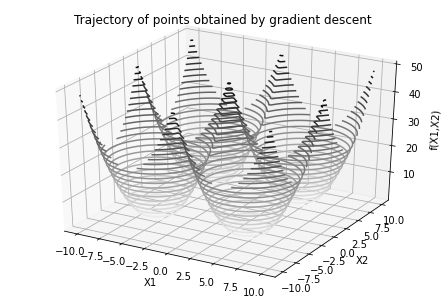

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

#Animation code inspired from https://www.bragitoff.com/2020/10/3d-trajectory-animated-using-matplotlib-python/

# The function used in animation call 
def func(num, trajectory_coord, line):
    # NOTE: there is no .set_data() for 3 dim data...
    line.set_data(trajectory_coord[0:2, :num])    
    line.set_3d_properties(trajectory_coord[2, :num])    
    return line

 
 
#generate the contours for function f(x1,x2)= (|x1|-5)^2 + (|x2|-5)^2
x1 = np.linspace(-10,10,100)
x2 = np.linspace(-10,10,100)

X1, X2 = np.meshgrid(x1, x2)
Z = (np.abs(X1)-5)**2+(np.abs(X2)-5)**2





    
#changing the step length and checking
tol = 1e-3
#step_length = 0.9 #step_length is no longer required
point = np.array([0.,0.])
points_fval_trajectory = grad_descent_withbacktrackingls(tol, point)
#print(points_fval_trajectory)

numDataPoints = len(points_fval_trajectory[0])
#print('numDataPoints:',numDataPoints)
#print(points_fval_trajectory[0:2,:3])    

# Get handles to figure and axes
fig = plt.figure()
ax = Axes3D(fig)
 
ax.contour3D(X1, X2, Z, 30, cmap='binary')    
#ax.plot_surface(X1, X2, Z,cmap='plasma', edgecolor='none')


#Note: in 2d plots, we can pass empty arguments to plot function when initializing
#However, we need to pass data into 3d plot function, cannot pass empty arguments
line = plt.plot(points_fval_trajectory[0], points_fval_trajectory[1], points_fval_trajectory[2], lw=2, c='r')[0] # For line plot
 
# set axes properties
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('f(X1,X2)')
ax.set_title('Trajectory of points obtained by gradient descent')
 
# Create Animation object
line_ani = animation.FuncAnimation(fig, func, frames=numDataPoints, fargs=(points_fval_trajectory,line), interval=50, blit=False)
#we can save the animation as a file 
#line_ani.save(r'AnimationNew.mp4')

#render the animation as a video and display it 
HTML(line_ani.to_html5_video())
